# Applied Linear Algebra Lab #2

## Завдання 1: Обчислення власних значень та власних векторів матриц

In [1]:
import numpy as np

def find_eigen_values_and_vectors(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Matrix should be NxN size")

    # обчислення власних значень та веторів за допомогою бібліотеки numpy
    eigenvalues, eigenvectors = np.linalg.eig(matrix)


    # для кожного власного значення, перевіряємо
    # A * v = λ * v
    for i in range(len(eigenvalues)):
        # власне значення - λ
        lambda_i = eigenvalues[i]

        # self vector v
        v_i = eigenvectors[:, i]

        # Добуток матриці на вектор A * v
        A_v = np.dot(matrix, v_i)

        # λ * v
        lambda_v = lambda_i * v_i

        # Використовуємо all close чи перевірити чи насправді вони однакові
        if not np.allclose(A_v, lambda_v):
            print(f"{A_v}, {lambda_v}\nA * v = λ * v has not accomplished")
        else:
            print(f"{A_v},\nA * v = λ * v has accomplished")

    return (eigenvalues, eigenvectors)


### Example of usage

In [2]:
matrix = np.array([
                   [4, -2],
                   [1, 1]])
eigenvalues, eigenvectors = find_eigen_values_and_vectors(matrix)

print("Eigen value:", eigenvalues)
print("Eigen vectors:\n", eigenvectors)

[2.68328157 1.34164079],
A * v = λ * v has accomplished
[1.41421356 1.41421356],
A * v = λ * v has accomplished
Eigen value: [3. 2.]
Eigen vectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


## Реалізація методу зменшення розмірності зображення за допомогою аналізу головних компонент (PCA: Image Compression)

### STEP 1 Завантаження зображення

Size of first photo: (1383, 922, 3)


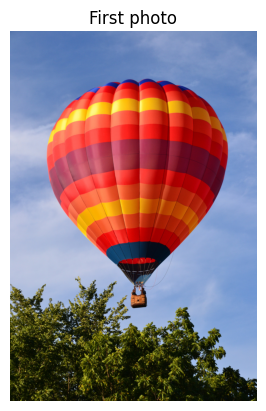

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA

image_raw = imread("photo.jpg")

print("Size of first photo:", image_raw.shape)

plt.imshow(image_raw)
plt.title("First photo")
plt.axis('off')
plt.show()



## STEP 2 Виведення чорно-білого зображення

Size of black-white photo: (1383, 922)


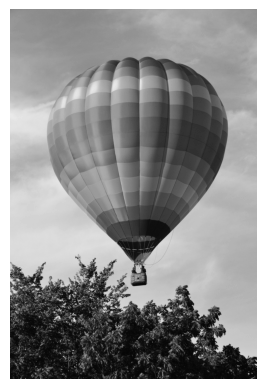

In [4]:
image_sum = image_raw.sum(axis=2)
image_bw = image_sum / image_sum.max()
print("Size of black-white photo:", image_bw.shape)


plt.imshow(image_bw, cmap='gray')
plt.title("")
plt.axis('off')
plt.show()

##  STEP 3 Застосування PCA

Кількість компонент 95% дисперсії: 56


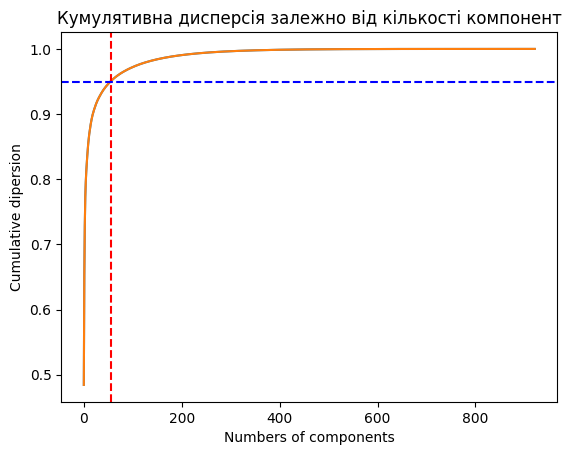

In [5]:
pca = PCA()
pca.fit(image_bw)

# Кумулятивна дисперсія
cum_dispersion = np.cumsum(pca.explained_variance_ratio_)

# Знаходження кількості компонент для покриття 95% дисперсії
number_comp95 = np.argmax(cum_dispersion >= 0.95) + 1
print(f"Кількість компонент 95% дисперсії: {number_comp95}")

# Графік кумулятивної дисперсії
plt.plot(cum_dispersion)
plt.xlabel("Numbers of components")
plt.ylabel("Сumulative dipersion")

plt.title("Кумулятивна дисперсія залежно від кількості компонент")

plt.plot(cum_dispersion)
plt.xlabel("Numbers of components")
plt.ylabel("Сumulative dipersion")
plt.title("Кумулятивна дисперсія залежно від кількості компонент")

plt.axvline(number_comp95, color='r', linestyle='--')
plt.axhline(y=0.95, color='b', linestyle='--')
plt.show()

## STEP 4 Реконструкція зображення з обмеженою кількістю компонент

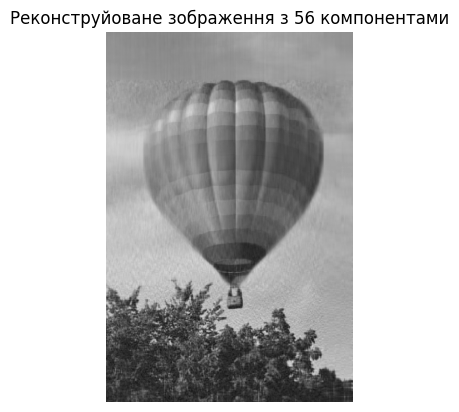

In [6]:
number_comp = number_comp95

pca = PCA(n_components=number_comp)
image_bw_pca = pca.fit_transform(image_bw)
image_bw_reconstructed = pca.inverse_transform(image_bw_pca)

# Відображення реконструйованого зображення
plt.imshow(image_bw_reconstructed, cmap='gray')
plt.title(f"Реконструйоване зображення з {number_comp} компонентами")
plt.axis('off')
plt.show()

## STEP 5 Функція для реконструкції зображення з заданою кількістю компонент

In [7]:
def reconstruct_image(image, comp_numb):
    pca = PCA(n_components=comp_numb)
    image_pca = pca.fit_transform(image)
    image_reconstr = pca.inverse_transform(image_pca)
    return image_reconstr



# Реконструкція та відображення зображень для різної кількості компонент

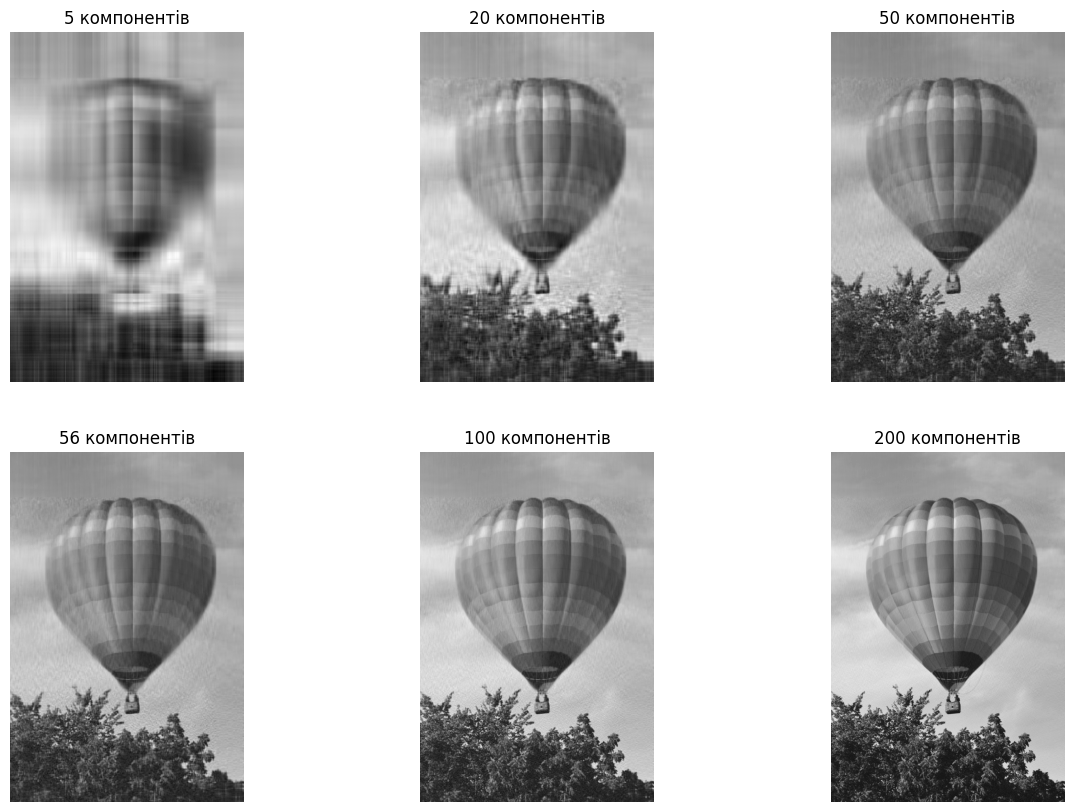

In [8]:
components_list = [5, 20, 50,number_comp, 100, 200]

plt.figure(figsize=(15, 10))
for i, n_components in enumerate(components_list):
    plt.subplot(2, 3, i + 1)
    image_reconstructed = reconstruct_image(image_bw, n_components)
    plt.imshow(image_reconstructed, cmap='gray')
    plt.title(f"{n_components} компонентів")
    plt.axis('off')

plt.show()

## Завдання 3: Використання діагоналізації, власних значень та векторів в криптографії.

In [9]:
def encrypt_message(message, key_matrix):
    
    # перетворили повідомлення на вектор ASCII кодів
    message_vector = np.array([ord(char) for char in message])
    
    # дістали власні значення та власні вектори клю-матриці
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    
    # діагоналізація матриці ключа
    diagonalized_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
    #  всі елементи поза головною діагоналлю дорівнюють нулю
    #  Власні значення розміщуються на головній діагоналі, а власні вектори використовуються для трансформації
    
    
    # шифрування повідомлення шляхом множення діагоналізованої матриці ключа на вектор повідомлення
    encrypted_vector = np.dot(diagonalized_matrix, message_vector)
    
    return encrypted_vector

# Функція для розшифрування повідомлення
def decrypt_message(encrypted_vector, key_matrix):
    
    # дістали власні значення та власні вектори клю-матриці
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    
    # діагоналізація матриці за допомогою обернених власних значень
    diagonalized_matrix = np.dot(np.dot(eigenvectors, np.diag(1 / eigenvalues)), np.linalg.inv(eigenvectors))
    
    # діагоналізованої матриці * зашифрований вектор
    decrypted_vector = np.dot(diagonalized_matrix, encrypted_vector)
    
    # Перевели зашифорване повідомлення у звичайне, за допомогою ASCII таблички
    decrypted_message = ''.join(chr(int(np.round(np.real(num)))) for num in decrypted_vector)
    return decrypted_message


message = "Hello, World!"
# Генерація випадкової матриці ключа
matrix = np.random.randint(0, 256, (len(message), len(message)))


encrypted_message = encrypt_message(message, matrix)
print("Encrypted Message:", encrypted_message)

decrypted_message = decrypt_message(encrypted_message, matrix)
print("Decrypted Message:", decrypted_message)

Encrypted Message: [151919.+1.48670882e-11j 180159.+1.01936798e-11j 116601.-1.33729331e-12j
  98642.+5.16990978e-12j 144735.+8.28750539e-12j 139679.+1.15868092e-11j
 175359.+5.62909685e-12j 140223.+1.16636038e-11j 159772.+5.73849303e-12j
 164016.-9.14359137e-13j 150144.-2.25152160e-12j 144820.+3.89585673e-13j
 167324.+1.27038923e-11j]
Decrypted Message: Hello, World!
